# Project Predictive Analytics By Isa Aulia Almadani - Prediksi Harga Jual Mobil dengan Machine Learning
* Proyek ini bertujuan untuk membuat model prediksi harga jual mobil berdasarkan fitur-fitur utama yang ada pada mobil.
* Proyek ini dikerjakan untuk memenuhi persyaratan menyelesaikan kelas [Machine Learning Terapan by Dicoding](https://www.dicoding.com/academies/319/tutorials/17052)
* Nama: Isa Aulia Almadani
* Asal Domisili: Sukoharjo, Jawa Tengah

## **Dara Understanding**
Ini adalah bagian awal dari alur pembuatan model. Tahapanya ada import library yang diperlukan, pengumpulan data yang terdapat di github, dan pemuatan dataset CSV dari GitHUbke dalam DataFrame melalui Pandas.

### 1. Importing the required libraries for model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import  OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### 2. Data Gathering and Data Loading

In [ ]:
url = 'https://github.com/Symphoen1x/Dicoding_Expert/blob/main/car_new.csv?raw=true'
df_early= pd.read_csv(url)
df_early

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### 3. Description variable


In [ ]:
df_early.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
for col in df_early:
    print(col)
    print(df_early[col].unique())
    print(df_early[col].nunique())
    print(20*'=')

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' 

**Notes:**

Variabel - variabel pada dataset [Car Features and MSRP](https://www.kaggle.com/datasets/CooperUnion/cardataset) diantaranya:
* Make: Merek/manufaktur mobil (BMW, Acura, linkoln, dll).
*	Model: Model spesifik dari mobil (1 Series M, 1 Series, dll).
*	Year: Tahun produksi mobil.
*	Engine Fuel Type: Jenis bahan bakar mesin (gasoline, diesel, etc).
*	Engine HP: Tenaga kuda mesin dalam satuan horsepower.
*	Engine Cylinders: Jumlah silinder mesin.
*	Transmission: Tipe transmisi (manual, auto, dll).
* Type	Driven_Wheels:Roda penggerak (rear wheel drive, all wheel drive	, dll).
*	Number of Doors: Jumlah pintu mobil.
*	Market Category: Kategori pasar mobil (Factory Tuner,Luxury,High-Performance, Luxury, dll).
* Vehicle Size: Ukuran mobil (Compact, midsize, dll).
* Vehicle Style: Gaya/model mobil (Coupe, Convertible, dll).
* highway MPG: Jarak tempuh per galon di jalan tol.
* city mpg: Jarak tempuh per galon di perkotaan.
* Popularity: Tingkat popularitas mobil.
* MSRP: Harga jual yang disarankan produsen.

Untuk informasi detailnya terdapat dalam laporan project ini.

**Notes:**
Berdasarkan visualisasi DataFrame tersebut, informasi di dalamnya dapat lihat sebagai berikut:
* Dataset ini memiliki 11.913 baris dan 16 kolom. Sumber dataset: [Car Features and MSRP](https://www.kaggle.com/datasets/CooperUnion/cardataset).
* Masing masing variabel memiliki nilai unik yang bervariasi.


## Exploratory Data Analysis or (EDA)
EDA merupakan proses fundamental dalam analytics untuk memahami dan mengeksplorasi data sebelum melakukan modelling. EDA sangat diperlukan dalam analisis karena membantu menghasilkan model yang akurat. Pada proses EDA kali ini, terdapat lima tahapan yang akan dilakukan, yaitu Check characteristic data, Data Assesing, Data Cleaning, Univariate Analysis, dan Multivariate Analysis.

### 1. Check characteristic data

In [ ]:
df_early.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 2. Data Assesing
Tahap assesing/penilaian bertujuan untuk menganalisis bagaimana kualiatas seluruh data yang ada dalam kedua dataset tersebut seperti missing value yang ada, keberadaan duplikasi data yang ada, keberadaan outlier dari kedua dataset, perlukah mengganti nama variabel sesuai tujuan, kesesuaian tipe variabel, dll.

#### 2.1 Checking the missing or null values
Proses ini penting dilakukan karena fitur-fitur memiliki nilai null/NaN dapat mempengaruhi hasil analisis data.

In [ ]:
print(df_early.isna().sum())


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Axes: >

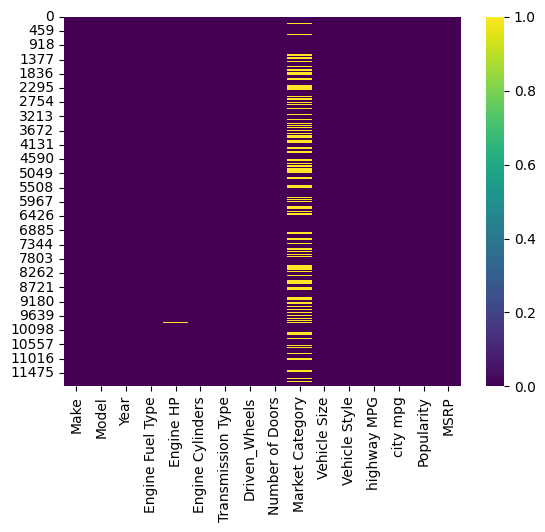

In [ ]:
sns.heatmap(df_early.isna(), cmap='viridis')

**Notes:**

* Berdasarkan output di atas, terdapat lima fitur yang memiliki nilai null/NaN. Fitur-fitur tersebut nantinya akan dihapus di tahap Data Cleaning.
* Salah satu visualisasi di atas akan dijadikan bukti keberhasilan proses penanganan masalah ini.

#### 2.2 Checking the duplicate rows
Tujuan dari proses ini untuk melihat keberadaan data yang terduplikasi

In [ ]:
df_early.shape

(11914, 16)

In [ ]:
detactor =df_early[df_early.duplicated()]
print(f'jumlah data terduplikasi, jumlah kolom: {detactor.shape}')


jumlah data terduplikasi, jumlah kolom: (715, 16)


In [ ]:
df_early.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

**Notes:**
* Berdasarkan visualisasi di atas terlihat bahwa jumlah data yang terduplikasi adalah 715 data dari seluruh kolom yang berjumlah 16.
* Kemudian, visualisasi jumlah data dari setiap kolom digunakan untuk melihat perbedaan sebelum kolom yang terduplikasi dihapus dan sebagai bukti berhasil atau tidaknya proses tersebut.

#### 2.3 Detecting Outliers
Tujuan dari tahap ini untuk melihat keberadaan dari outliers pada data.

In [ ]:
df_early.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

<Axes: xlabel='Year'>

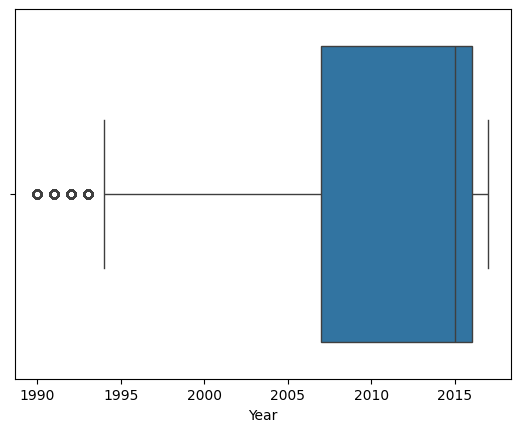

In [ ]:
sns.boxplot(x=df_early['Year'])

<Axes: xlabel='Engine HP'>

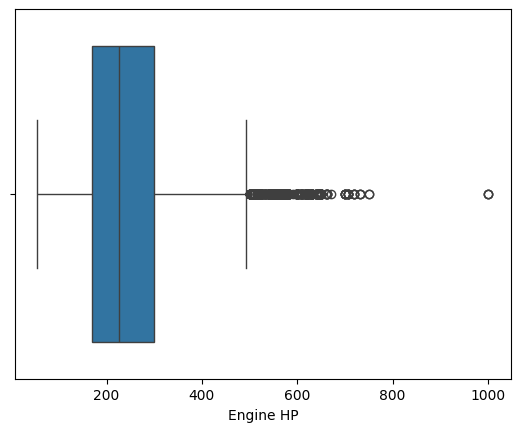

In [ ]:
sns.boxplot(x=df_early['Engine HP'])


<Axes: xlabel='Engine Cylinders'>

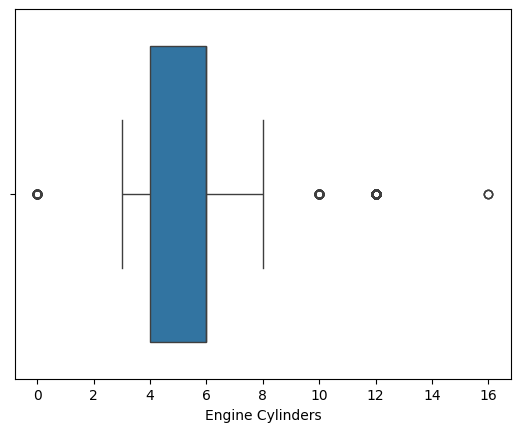

In [ ]:
sns.boxplot(x=df_early['Engine Cylinders'])


<Axes: xlabel='highway MPG'>

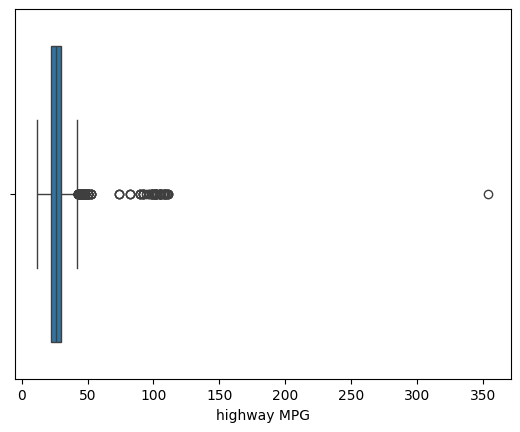

In [ ]:
sns.boxplot(x=df_early['highway MPG'])

<Axes: xlabel='city mpg'>

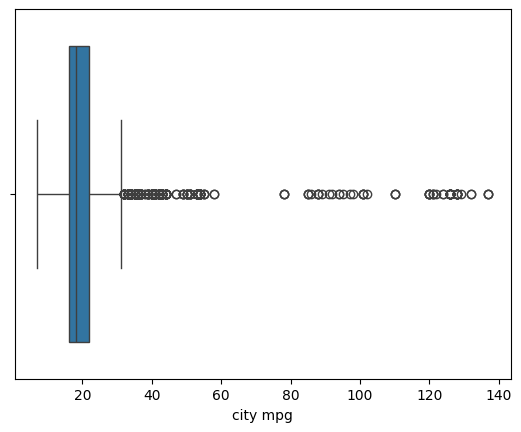

In [ ]:
sns.boxplot(x=df_early['city mpg'])

<Axes: xlabel='Popularity'>

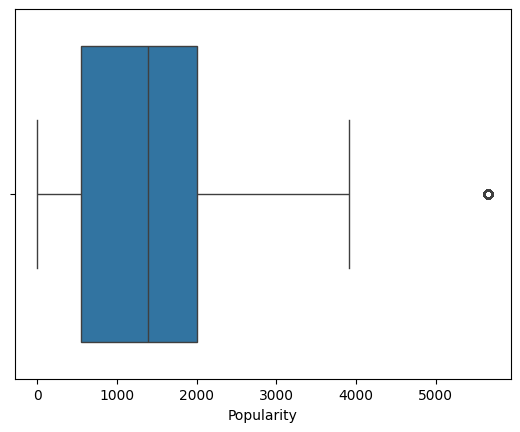

In [ ]:
sns.boxplot(x=df_early['Popularity'])

**Notes:**
* Berdasarskan visualisasi untuk mengecek keberadaan outlier diatas, terlihat bahwa terdapat beberapa fitur numerik yang mengandung outlier. Nantinya, Outlier-outlier tersebut akan dihapus menggunakan teknik atau metode IQR.

### 3. Data Cleaning
Data Cleaning adalah proses pembersihan data yang bertujuan untuk memastikan kualitas dan konsistensi data sebelum dilakukan analisis lebih lanjut. Tujuan utamanya adalah untuk menghilangkan masalah atau gangguan dalam dataset yang dapat memengaruhi hasil analisis statistik atau pembangunan model. Pada tahap ini akan dilakukan beberapa proses seperti Renaming the columns, dan Dropping the duplicated rows, Handling the outliers. Berikut implemetasi dan hasil yang didapat:

#### 3.1 Renaming the columns
Tujuanya agar nama variabel yang akan digunakan sesuai dengan yang ada di problem statements.

In [ ]:
df_early = df_early.rename(columns={'MSRP' : 'Harga_Jual'})
df_early.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Harga_Jual
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Notes:**
* Proses ini mengacu pada kolom target, yaitu MRSP untuk diubah menjadi Harga_Jual.

#### 3.2 Dropping the missing or null values
Berasarkan tahap sebelumnya, teradapat beberapa missing value yang dapat mengganggu proses analisis dan pembuatan prediktif model. Maka perlu adanya tindakan lebih lanjut untuk menangani keberadaanya, yaitu menghapus missing value.

In [ ]:
df_early = df_early.dropna()
print(df_early.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
Harga_Jual           0
dtype: int64


<Axes: >

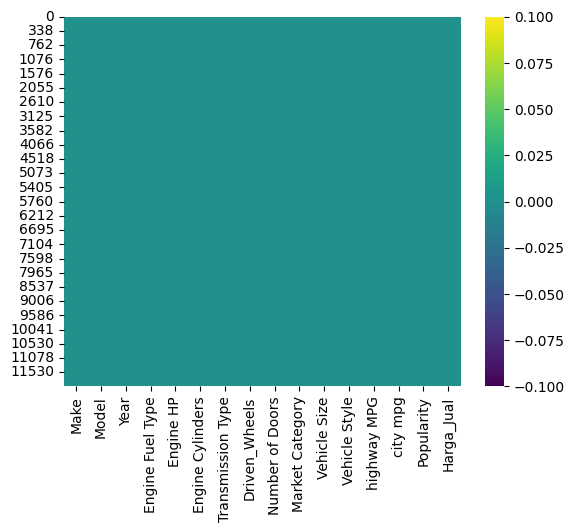

In [ ]:
sns.heatmap(df_early.isna(), cmap='viridis')


**Notes:**
* Seperti yang sudah dijelaskan sebelumnya bahwa untuk pembuktian bagaimana proses ini berhasil dilakukan atau tidak, visualisasi jumlah data di masing-masing kolom kembali di perlihatkan setelah proses penghapusan missing atau null value. Hasilnya, jumlah data telah berkurang dengan jumlah 8084 disetiap kolom dan missing atau null values sudah hilang.

#### 3.3 Dropping the duplicate rows
Terlihat di tahap sebelumnya bahwa terdapat data yang terduplikasi. Kali ini, proses lanjutan akan dilakukan untuk mengurangi gangguan yang ada pada data karena jumlahnya yang besar.

In [ ]:
df_early = df_early.drop_duplicates()
df_early.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Harga_Jual
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df_early.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
Harga_Jual           7735
dtype: int64

**Notes:**
* Setelah proses penanganan dilakukan, masalah duplikasi data dalam baris sudah berhasil di hapus sehingga jumlah data pun ikut berkurang di setiap kolom.

#### 3.4 Handling the outliers
Berdasarkan visualisasi keberadaan outlier di tahap sebelumnya, proses ini penting untuk dilakukan agar akurasi model yang dilatih tidak terpengaruh secara signifikan. Teknik yang akan digunakan seperti yang sudah disinggung sebelumnya, yaitu IQR. Teknik ini mengidentifikasi outlier yang ada dibatas  atas Q3 dan dibatas bawah atau Q1. Lalu, nilai-nilai yang ada di dalam batas akan digunakan sementara yang diluar kedua batas atau outlier akan dihapus

In [ ]:
Q1 = df_early.quantile(0.25)
Q3 = df_early.quantile(0.75)
IQR=Q3-Q1
df_final = df_early[~((df_early<(Q1-1.5*IQR))|(df_early>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-23-93ca091d7162>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_early.quantile(0.25)
<ipython-input-23-93ca091d7162>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_early.quantile(0.75)
<ipython-input-23-93ca091d7162>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final = df_early[~((df_early<(Q1-1.5*IQR))|(df_early>(Q3+1.5*IQR))).any(axis=1)]


In [ ]:
df_final.shape

(5622, 16)

In [ ]:
df_final.count()

Make                 5622
Model                5622
Year                 5622
Engine Fuel Type     5622
Engine HP            5622
Engine Cylinders     5622
Transmission Type    5622
Driven_Wheels        5622
Number of Doors      5622
Market Category      5622
Vehicle Size         5622
Vehicle Style        5622
highway MPG          5622
city mpg             5622
Popularity           5622
Harga_Jual           5622
dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               5622 non-null   object 
 1   Model              5622 non-null   object 
 2   Year               5622 non-null   int64  
 3   Engine Fuel Type   5622 non-null   object 
 4   Engine HP          5622 non-null   float64
 5   Engine Cylinders   5622 non-null   float64
 6   Transmission Type  5622 non-null   object 
 7   Driven_Wheels      5622 non-null   object 
 8   Number of Doors    5622 non-null   float64
 9   Market Category    5622 non-null   object 
 10  Vehicle Size       5622 non-null   object 
 11  Vehicle Style      5622 non-null   object 
 12  highway MPG        5622 non-null   int64  
 13  city mpg           5622 non-null   int64  
 14  Popularity         5622 non-null   int64  
 15  Harga_Jual         5622 non-null   int64  
dtypes: float64(3), int64(5)

**Notes:**
* Berdasarkan hasil dari teknik diatas bahwa visualisasi menunjukana adanya perbedaan jumlah data yang ada disetiap kolom. Itu menandakan bahwa dataset kita telah bersih dan menyisakan 5622 sampel.

### 4. Exploratory Data Analysis -Univariate Analysis
Kenapa Univariate Analysis? jadi tujuan melakukan analysis ini untuk memahami karakteristik dari satu variabel tunggal dalam dataset tanpa ada memperhatikan hubungan variabel lain. Tahap kali ini, Univariate analysis dilakukan dengan memisah categorical feature dengan numerical features.

#### 4.1 Separate the numerical and categorical features

In [ ]:
numerical_features = df_final.select_dtypes(include = [np.number])
categorical_features = df_final.select_dtypes(exclude = [np.number])

**Notes:**
* Proses ini dilakukan dengan bantuan library numpy beserta parameter yang diperlukan.
* Include mengacu pada tipe data numerik, sementara exclude sebaliknya kecuali tipe data numerik atau mengacu pada tipe data kategorik.

#### 4.1 Categorical Feature

In [ ]:
for var in categorical_features:
  count = df_final[var].value_counts()
  percent = 100 * df_final[var].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(f"Statistik untuk fitur {var}:\n")
  print(df)
  print("\n")
  fig = px.histogram(categorical_features, x=var, color_discrete_sequence = ['#C9A26B'])
  fig.show()

Statistik untuk fitur Make:

               jumlah sampel  persentase
Chevrolet                570        10.1
Volkswagen               374         6.7
Cadillac                 340         6.0
Infiniti                 311         5.5
Nissan                   268         4.8
GMC                      266         4.7
Dodge                    242         4.3
Audi                     240         4.3
BMW                      235         4.2
Toyota                   214         3.8
Honda                    204         3.6
Acura                    203         3.6
Mazda                    203         3.6
Volvo                    187         3.3
Subaru                   180         3.2
Hyundai                  179         3.2
Mercedes-Benz            169         3.0
Lexus                    159         2.8
Lincoln                  139         2.5
Buick                    123         2.2
Chrysler                 102         1.8
Kia                      101         1.8
Land Rover                95

Statistik untuk fitur Model:

                jumlah sampel  persentase
Silverado 1500            114         2.0
Sierra 1500                56         1.0
XC60                       52         0.9
370Z                       51         0.9
Tundra                     51         0.9
...                       ...         ...
G3                          1         0.0
Cayman S                    1         0.0
Catera                      1         0.0
Blackwood                   1         0.0
Zephyr                      1         0.0

[461 rows x 2 columns]




Statistik untuk fitur Engine Fuel Type:

                                              jumlah sampel  persentase
regular unleaded                                       2432        43.3
premium unleaded (recommended)                         1236        22.0
premium unleaded (required)                            1174        20.9
flex-fuel (unleaded/E85)                                638        11.3
diesel                                                  107         1.9
flex-fuel (premium unleaded recommended/E85)             26         0.5
flex-fuel (premium unleaded required/E85)                 9         0.2




Statistik untuk fitur Transmission Type:

                  jumlah sampel  persentase
AUTOMATIC                  4354        77.4
MANUAL                      956        17.0
AUTOMATED_MANUAL            312         5.5




Statistik untuk fitur Driven_Wheels:

                   jumlah sampel  persentase
front wheel drive           1998        35.5
all wheel drive             1689        30.0
rear wheel drive            1451        25.8
four wheel drive             484         8.6




Statistik untuk fitur Market Category:

                                                 jumlah sampel  persentase
Crossover                                                  984        17.5
Flex Fuel                                                  645        11.5
Luxury                                                     604        10.7
Luxury,Performance                                         555         9.9
Crossover,Luxury                                           406         7.2
Performance                                                400         7.1
Hatchback                                                  393         7.0
High-Performance                                           185         3.3
Hatchback,Performance                                      173         3.1
Luxury,High-Performance                                    172         3.1
Factory Tuner,Luxury,High-Performance                      128         2.3
Crossover,Luxury,Performance                               1

Statistik untuk fitur Vehicle Size:

         jumlah sampel  persentase
Midsize           2365        42.1
Compact           1986        35.3
Large             1271        22.6




Statistik untuk fitur Vehicle Style:

                     jumlah sampel  persentase
4dr SUV                       1857        33.0
Sedan                         1294        23.0
4dr Hatchback                  477         8.5
Coupe                          476         8.5
Convertible                    358         6.4
2dr Hatchback                  262         4.7
Crew Cab Pickup                256         4.6
Wagon                          233         4.1
Regular Cab Pickup             145         2.6
Extended Cab Pickup            142         2.5
Passenger Minivan               53         0.9
Passenger Van                   34         0.6
Cargo Van                       16         0.3
2dr SUV                          9         0.2
Cargo Minivan                    5         0.1
Convertible SUV                  5         0.1




**Notes:**
* Berdasarkan visualisasi diatas, muncul karakteristik data untuk setiap kolom kategorikal dengan jumlah setiap datanya.
* Terlihat bahwa setiap kolom kategorikal diatas memiliki karakteristik yang unik dan berbeda-beda

#### 4.2 Numerical Features

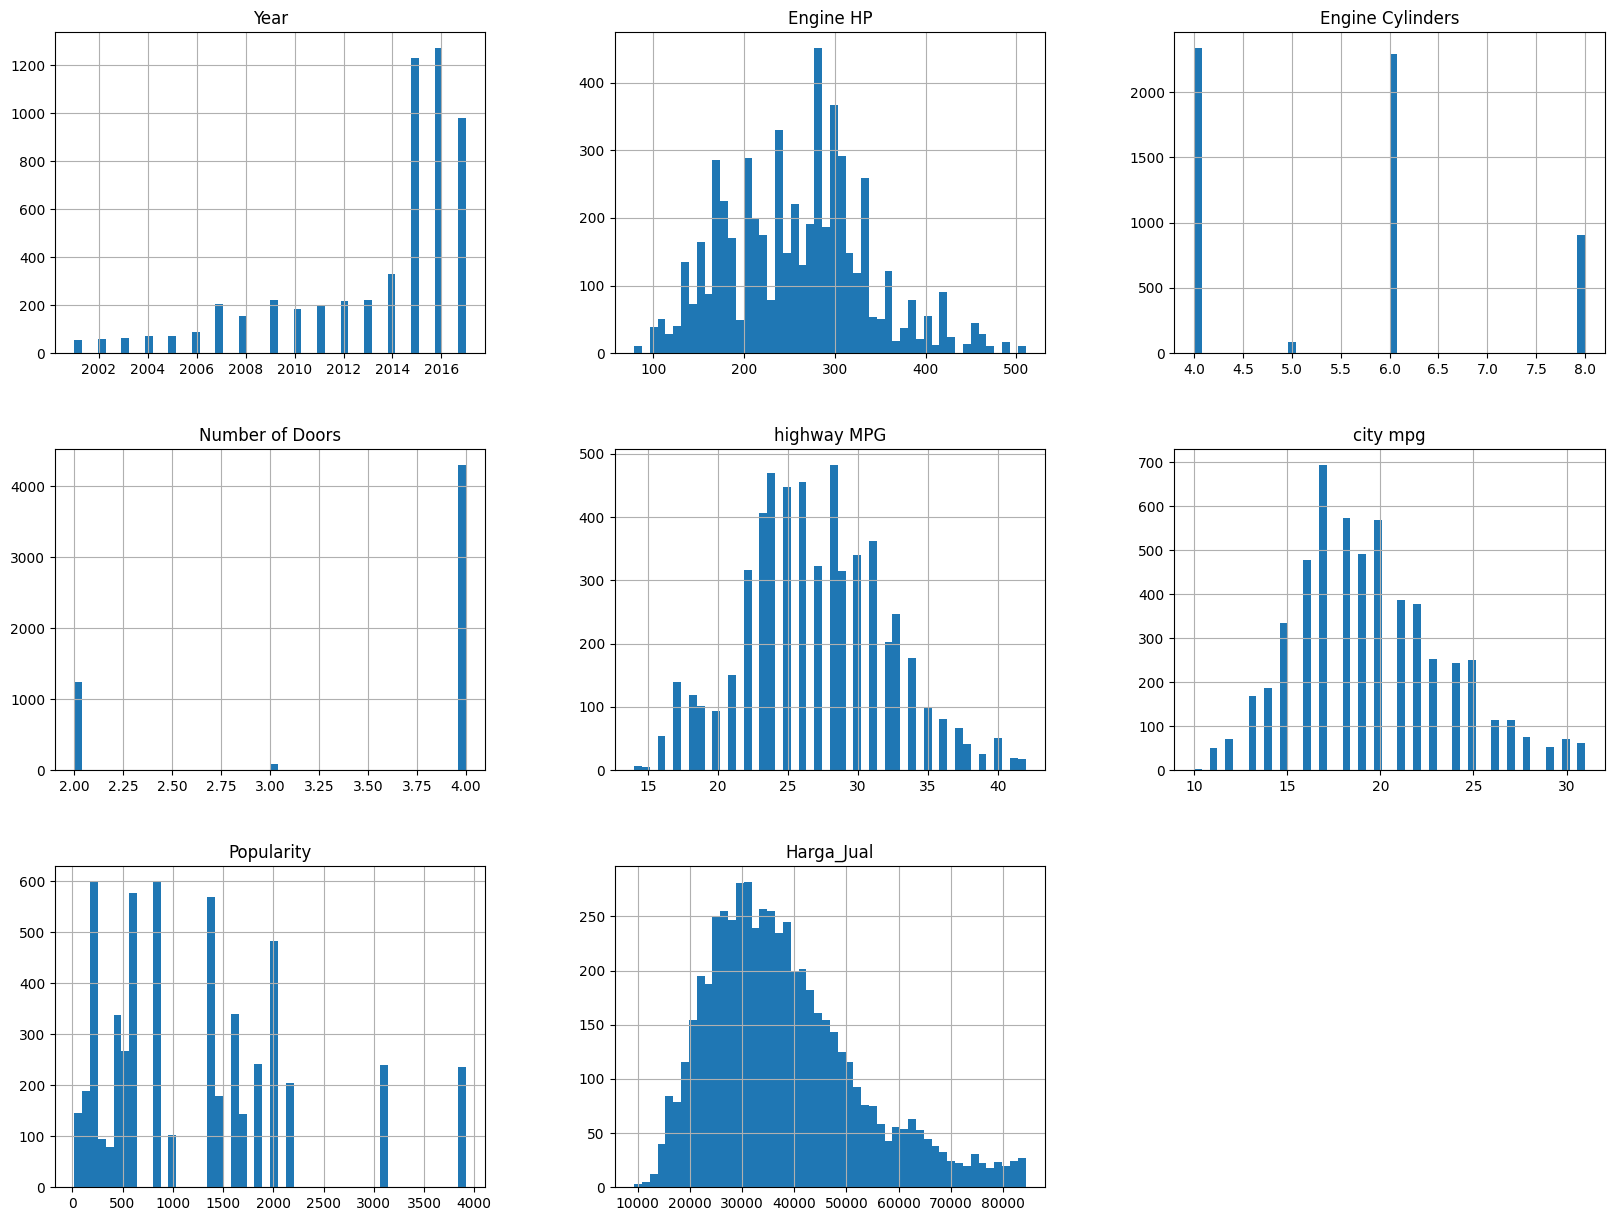

In [ ]:
df_final.hist(bins=50, figsize=(20,15))
plt.show()

**Notes:**
* Sebagai target atau y_true, variabel Harga_Jual terdistribusi dengan cukup baik karena terlihat sampel data cenderung meningkat di awal kemudian semakin turun sejalan  dengan peningkatan tenaga mesin, jumlah pintu, dan MPG.
* Tenaga mesin dan silinder mesin umumnya meningkat selama bertahun-tahun. Hal ini kemungkinan disebabkan oleh meningkatnya permintaan akan kinerja dan efisiensi bahan bakar.


### 5. Exploratory Data Analysis -Multivariate Analysis
Analysis ini bertujuan untuk memahami hubungan antara dua atau lebih variabel dalam sebuah data set. Seperti analysis sebelumnya, kali ini juga melakukan pemisahan antara numerical feature dan categorical feature. Nantinya, masing masing feature tersebut akan dianalisis terhadap variabel target, yaitu Harga_Jual.

#### 5.1 Categorical Features

In [ ]:
for var in categorical_features:
    fig = px.histogram(df_final, x=var, y='Harga_Jual', color_discrete_sequence=['#C9A26B'])
    fig.update_layout(title="Rata-rata CNT Relatif terhadap - {}".format(var))
    fig.show()


**Notes:**
* Berdasarkan visualisasi diatas, insight yang bisa diperoleh sangat banyak dari setiap hubungan variabel-variabel numerik terhadap Harga_Jual.
* Beberapa ada yang berpengaruh tinggi seperti di fitur Transmission Type, Harga_Jual memiliki pengaruh paling tinggi di tipe Automatic.
* Beberapa diantaranya juga sangat rendah seperti fitur Veichel Style, terlihat bahwa 2dr SUV memiliki pengaruh yang kecil terhadap variabel target atau Harga_Jual.
* Untuk informasi mengenai visualisasi secara spesifik dari setiap variabel akan diperjelas di file laporan.

#### 5.2 Numerical Features

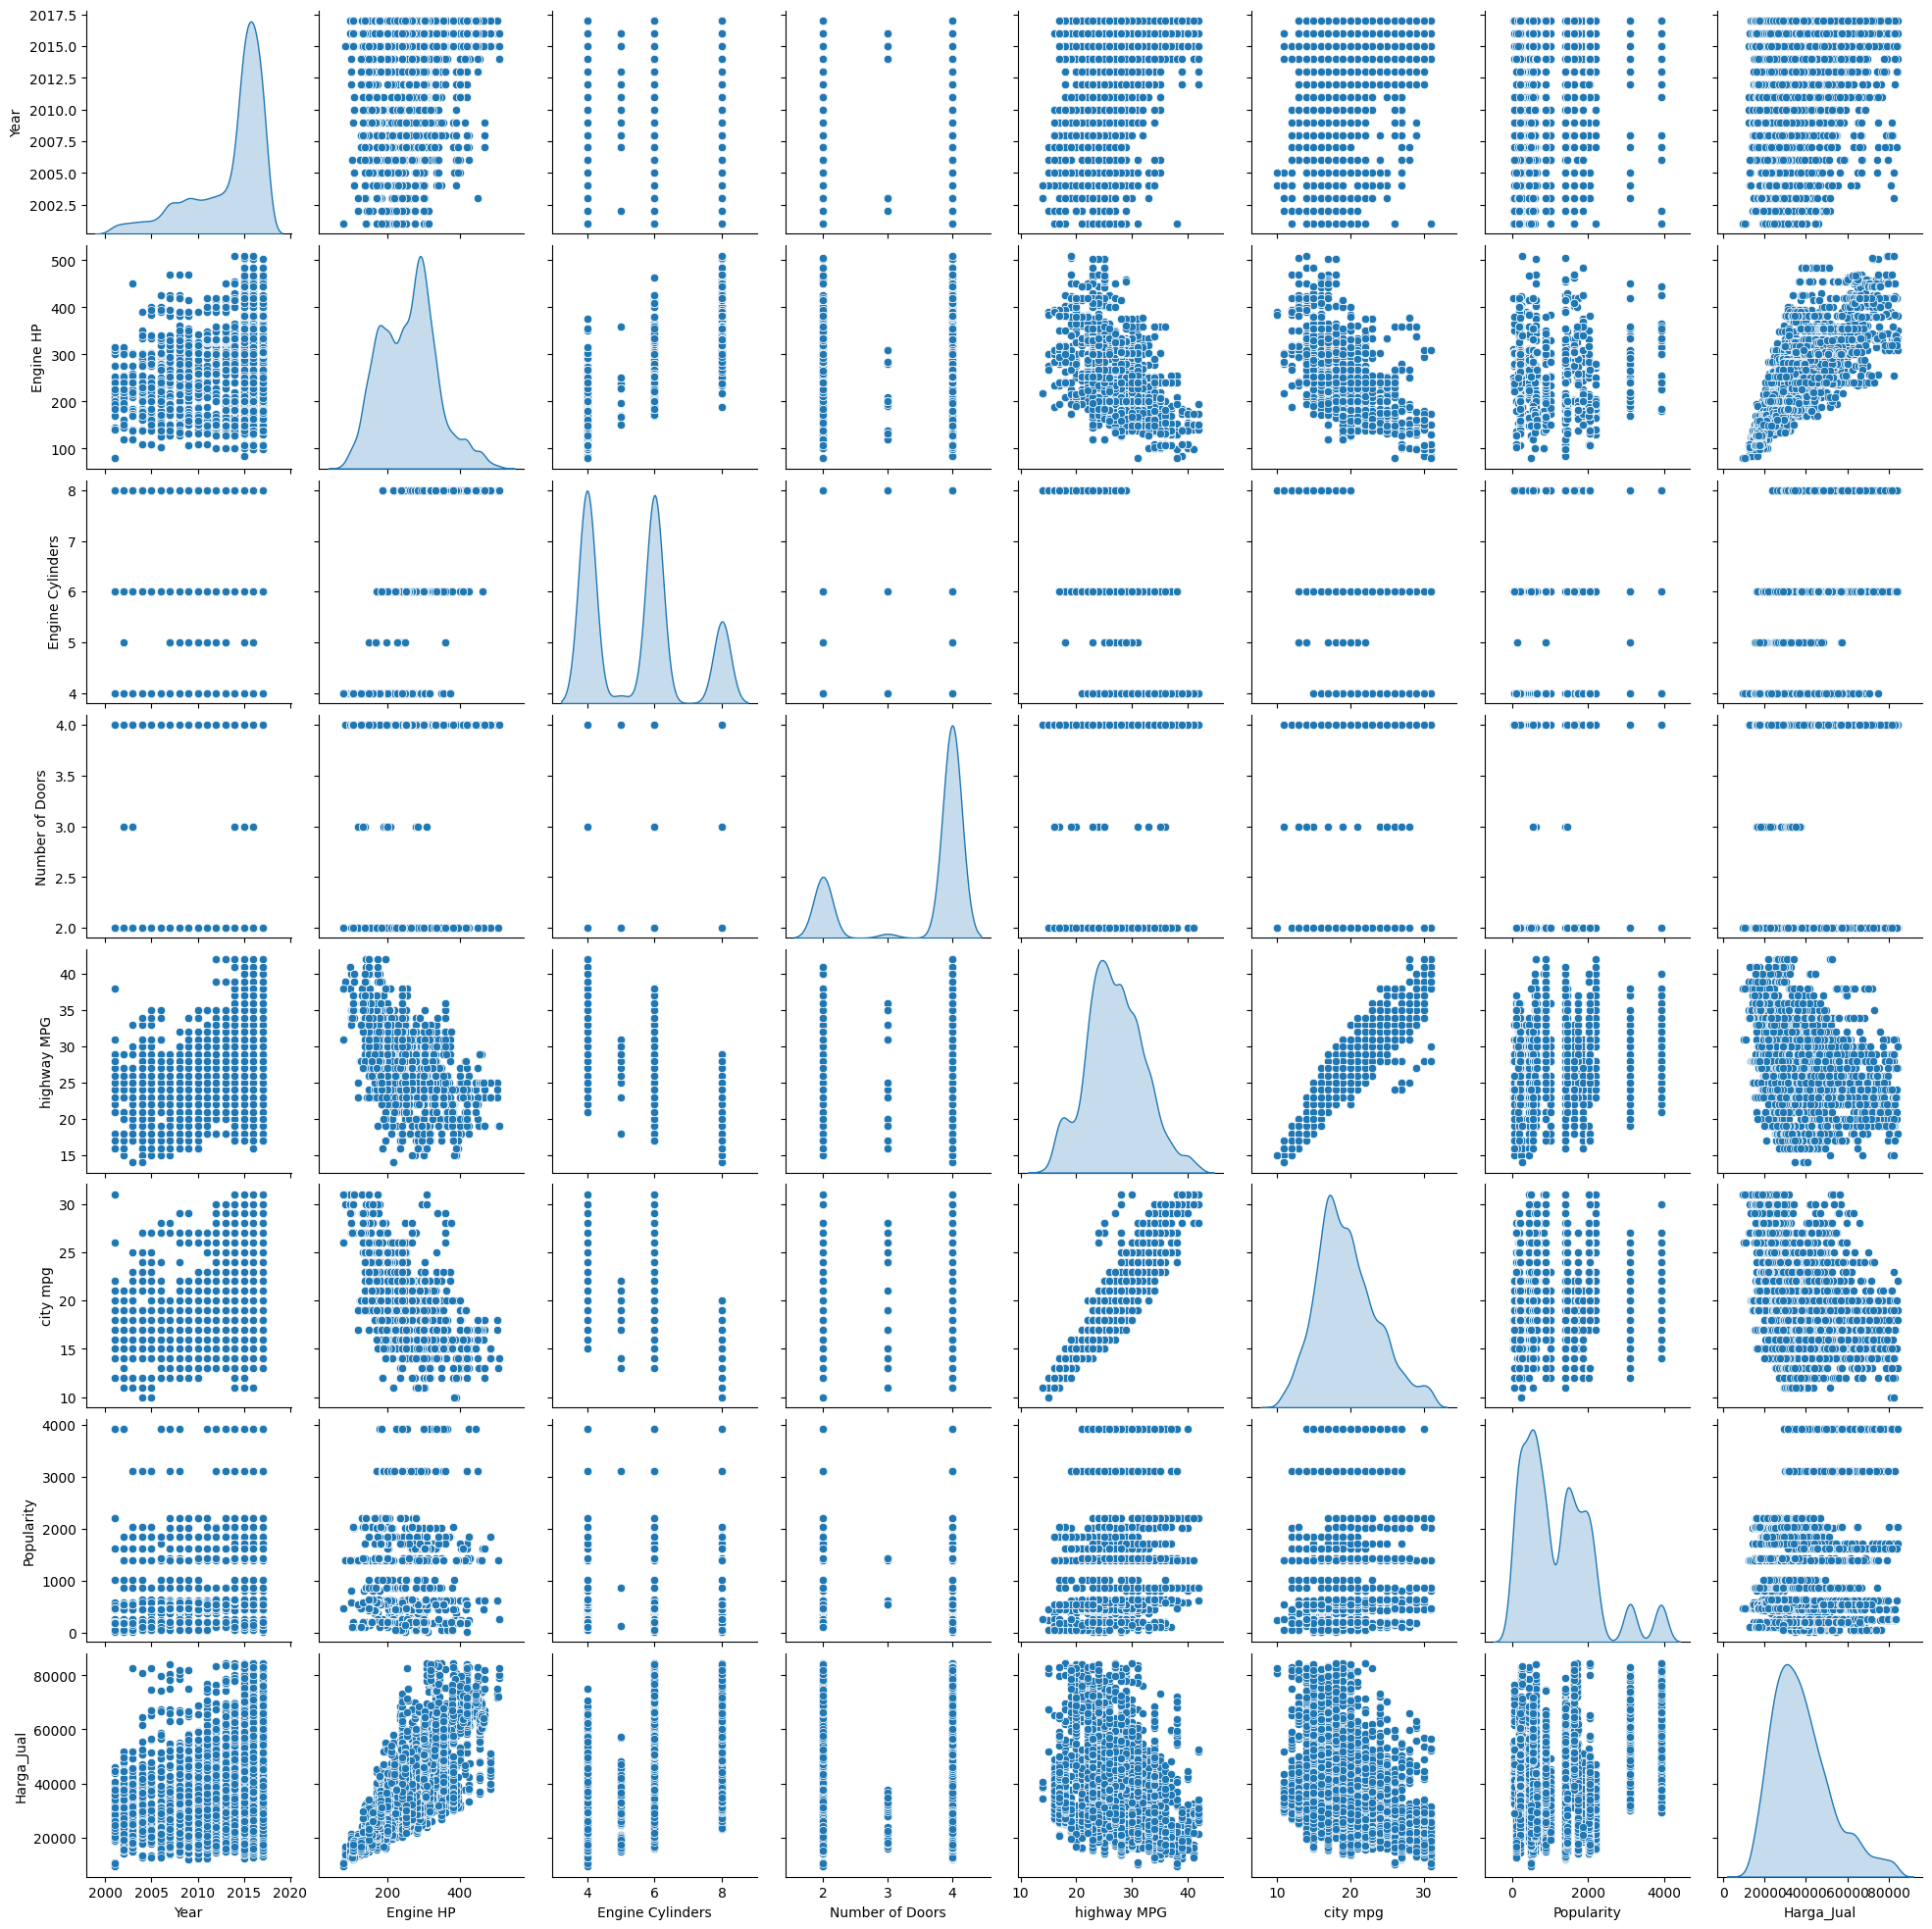

In [ ]:
sns.pairplot(df_final, diag_kind = 'kde')

<ipython-input-32-399c97570b60>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

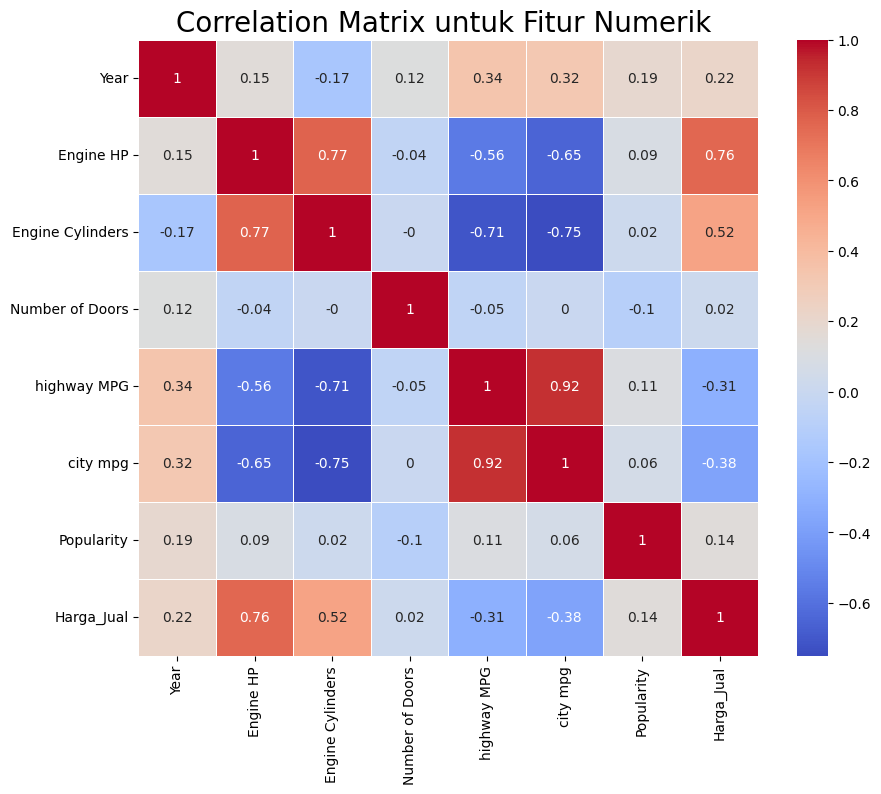

In [ ]:
plt.figure(figsize=(10, 8))
c = df_final.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=c, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
df_final.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Harga_Jual
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Notes:**
* Berdasarkan visualisasi diatas, terdapat dua jenis visualisasi untuk fitur-fitur numerik, yaitu dengan bantuan Pairplot dan Corellation Matrix.
* Kolom yang memiliki korelasi tertinggi dengan variabel target Harga_Jual adalah Engine Hp.
* Dapat disimpulkan bahwa kolom-kolom yang berkorelasi sedang dengan variabel target Harga_Jual adalah higway MPG, city mpg, dan Engine Cylinders.
* Dapat disimpulkan bahwa kolom-kolom yang berkorelasi rendah dengan variabel target Harga_Jual adalah Popularity, Year, dan Number of Doors.
* Untuk kolom-kolom yang memiliki korelasi rendah maka akan dihapus.

#### 5.3 Dropping Irrelevant Columns
Berdasarkan hasil dari analisis diatas menunjukan bahwa terdapat beberapa fitur yang berhubungan kuat dengan fitur harga jual dan terdapat pula yang benar-benar lemah dengan indikasi nilai yang kecil seperti 0.02 dan lain-lain. Maka perlu untuk dilakukan penghapusan kolom sebagai solusi agar tujuan awal terpenuhi.

In [ ]:
df_final.drop(['Number of Doors', 'Popularity', 'Year'], inplace=True, axis=1)
df_final.head()


<ipython-input-34-8dc7bdef03cf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Harga_Jual
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [ ]:
df_final.describe()

,Engine HP,Engine Cylinders,highway MPG,city mpg,Harga_Jual
count,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000
mean,258.706866,5.472430,26.994486,19.543401,38082.881893
std,78.026600,1.430301,5.123642,4.119348,14478.059779
min,79.000000,4.000000,14.000000,10.000000,9299.000000
25%,200.000000,4.000000,24.000000,17.000000,27462.500000
50%,265.000000,6.000000,27.000000,19.000000,35577.500000
75%,305.000000,6.000000,30.000000,22.000000,45750.000000
max,510.000000,8.000000,42.000000,31.000000,84325.000000


## Data Preparation
Tahapan kali ini dilakukan dengan tujuan mengubah bentuk data menjadi bentuk yang cocok untuk proses pemodelan. Terdapat beberapa tahapan di dalamnya Encoding fitur kategori, Reduksi dimensi dengan PCA, proporsi dataset dengan fungsi train_test_split, dan Standarisasi.

### 1. Encoding Feature Category
Tahapan ini menggunakan teknik one-hot-encoding dengan tujuan untuk mendapatkan fitur baru yang sesuai. Fitur baru ini nantinya dapat digunakan untuk mewakili variabel kategori.

In [ ]:
df_final = pd.concat([df_final, pd.get_dummies(df_final['Make'], prefix='Make')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Engine Fuel Type'], prefix='Engine Fuel Type')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Market Category'], prefix='Market Category')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Vehicle Style'], prefix='Vehicle Style')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Vehicle Size'], prefix='Vehicle Size')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Model'], prefix='Vehicle Size')],axis=1)



df_final = pd.concat([df_final, pd.get_dummies(df_final['Driven_Wheels'], prefix='Driven_Wheels')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Transmission Type'], prefix='Transmission Type')],axis=1)
df_final.drop(['Model', 'Market Category', 'Engine Fuel Type', 'Vehicle Style', 'Vehicle Size', 'Engine Fuel Type', 'Make','Driven_Wheels','Transmission Type'], axis=1, inplace=True)
df_final.head()

,Engine HP,Engine Cylinders,highway MPG,city mpg,Harga_Jual,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,...,Vehicle Size_tC,Vehicle Size_xA,Vehicle Size_xD,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL
0,335.0,6.0,26,19,46135,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,300.0,6.0,28,19,40650,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,300.0,6.0,28,20,36350,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,230.0,6.0,28,18,29450,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,230.0,6.0,28,18,34500,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### 2. Reduksi Dimensi dengan PCA
Tahapan kali ini menggunakan teknik pengurangan dimensi yang bernama Principal Component Analysis (PCA). Tujuan dilakukan teknik ini untuk mengurangi dimensi dari data yang berdimensi tinggi atau dengan kata lain mengubah representasi data dengan banyak variabel menjadi data dengan jumlah variabel yang lebih sedikit. Hal ini sangat penting karena jika dataset memiliki banyak fitur yang mempersulit analisis, hal tersebut dapat menyebabkan overfitting atau masalah lain.

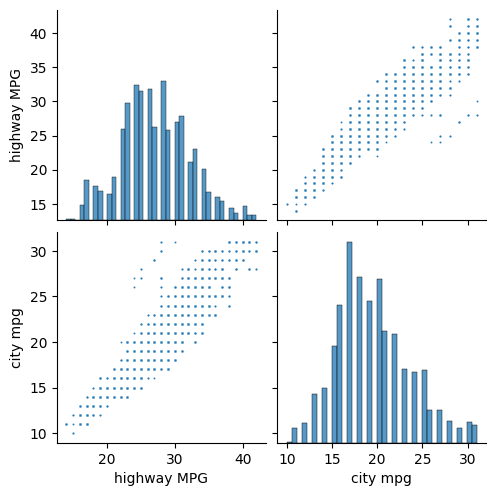

In [ ]:
sns.pairplot(df_final[['highway MPG','city mpg']], plot_kws={"s":2})

In [ ]:
pca = PCA(n_components=2, random_state=123)
pca.fit(df_final[['highway MPG','city mpg']])
princ_comp = pca.transform(df_final[['highway MPG','city mpg']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.96, 0.04])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df_final[['highway MPG','city mpg']])
df_final['dimension'] = pca.transform(df_final.loc[:, ('highway MPG','city mpg')]).flatten()
df_final.drop(['highway MPG','city mpg'], axis=1, inplace=True)

In [ ]:
df_final.head(3)

,Engine HP,Engine Cylinders,Harga_Jual,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Vehicle Size_xA,Vehicle Size_xD,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,dimension
0,335.0,6.0,46135,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,-1.117210
1,300.0,6.0,40650,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0.452164
2,300.0,6.0,36350,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1.072056


In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 11913
Columns: 590 entries, Engine HP to dimension
dtypes: float64(3), int64(1), uint8(586)
memory usage: 3.4 MB


**Notes:**
* Berdasarkan visualisasi diatas, fitur numerik yang digunakan dalam proses PCA tersebut ada dua fitur, yaitu highway MPG dan	city mpg. Kenapa tahapan ini menggunakan kedua fitur tersebut? karena keduanya memiliki korelasi yang cukup baik dan mengandung informasi yang sama, yaitu luas distribusi berdasarkan fungsi pairplot().
* Setelah dilakukan proses PCA, terdapat fitur baru bernama 'dimension'. Itu adalah fitur hasil pengurangan dimensi dari fitur 'highway MPG ' dan 'city mpg'.
* Kemduian, terdapat proses mengetahui proporsi dari kedua komponen tersebut yang menghasilkan kumpulan array yang merupakan Principal Component (PC). PC pertama maksudnya informasi mengenai dua fitur diatas sebagian besar terdapat di PC tersebut, sementara sisanya terdapat di PC dua. Pc pertama ini mewakili dua fitur melalui sebuah variabel baru yang bernama "dimension".

### 3. Train-Test-Split
Proses pembagian data menjadi train data atau data latih dan test data atau data uji. Proses ini dibantu oleh library sklearn dengan metode train_test_split. Untuk proporsi pembagian kedua data, yaitu 80:20.

In [ ]:
X = df_final.drop(['Harga_Jual'], axis = 1)
y = df_final['Harga_Jual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 5622
Total # of sample in train dataset: 4497
Total # of sample in test dataset: 1125


**Notes:**
* Terlihat hasil dari pembagian data diatas, train data sejumlah 4497 dan test data sejumlah 1125.

### 4. Standarisasi
Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Teknik ini digunakan untuk transformasi pada feature numerik. StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, penerapan dilakukan untuk fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, standarisasi dilakukan pada data uji.

In [ ]:
numerical_features = ['Engine HP',	'Engine Cylinders', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Engine HP,Engine Cylinders,dimension
3465,-0.623737,0.365971,-1.627129
5206,-0.034710,0.365971,-0.481224
11487,-0.393248,-1.030527,0.954516
10798,-1.046299,-1.030527,0.922709
1020,-1.135934,-1.030527,1.418014


**Notes:**
* Berdasarkan output diatas, terlihat benar bukan bahwa standarisasi mengubah nilai mean menjadi 0 dan nilai standar devisiasi menjadi 1. Sekitar 68% dari nilai akan berada di antara -1 dan 1.
* Berikut pendukung kuat dari hasil proses tersebut.

In [ ]:
X_train[numerical_features].describe().round(3)

,Engine HP,Engine Cylinders,dimension
count,4497.000,4497.000,4497.000
mean,-0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-2.301,-1.031,-2.406
25%,-0.752,-1.031,-0.700
50%,0.068,0.366,-0.069
75%,0.606,0.366,0.639
max,3.218,1.762,2.950


## Model Devlopment
Proses kali ini menunjukan penggunaan machine learning dengan beberapa Algoritma yang akan digunakan. Algoritma yang akan digunakan pada proses Model Devploment kali ini ada tiga, yaitu K-Nearest Neighbor, Random Forest, dan Boosting Algorithm. Sebelum itu, pembuatan DataFrame yang berisi ketiga algoritma diatas untuk membandingkan hasil prediksi terbaik perlu dibuat.

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


### 1. Model Devlopment Menggunakan Algoritma K-Nearest Neighbor atau KNN
KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

Kali ini, modelling dengan Algoritma KNN akan menggunakan bantuan hyperparameter tuning untuk menemukan kombinasi nilai optimal untuk hyperparameter dari sebuah model machine learning dengan tujuan meningkatkan performa model.

In [ ]:
knn = KNeighborsRegressor()
parameters_knn = {
    'n_neighbors' : [10, 20, 30, 40, 50, 60, 70, 80]
}


random_search_knn = GridSearchCV(knn, parameters_knn, scoring='neg_mean_squared_error', cv=5)

random_search_knn.fit(X_train,y_train)
print(f"RandomizedSearch score for KNN: {random_search_knn.best_score_}")
print("RandomizedSearch params for KNN: ")
print(random_search_knn.best_params_)

RandomizedSearch score for KNN: -23871881.20319546
RandomizedSearch params for KNN: 
{'n_neighbors': 10}


In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**Notes:**
* Berdasarkan pencarian parameter tuning dengan bantuan GridSearch dan metrix MSE, output muncul untuk nilai 'n_neighbors': 10 dan untuk skor evaluasi terbaik adalah -23874737.26177538.
* Kemudian, output tersebut akan digunakan dalam pemodelan menggunakan Algoritma KNN.

### 2. Model Devlopment Menggunakan Algoritma Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama.


Kali ini, modelling dengan Algoritma Random Forest akan menggunakan bantuan hyperparameter tuning untuk menemukan kombinasi nilai optimal untuk hyperparameter dari sebuah model machine learning dengan tujuan meningkatkan performa model.

In [ ]:
parameters_RandomForest = {
    'n_estimators': [30, 40, 50, 60, 70, 80],
    'max_depth': [16, 32, 64, 128],
}


random_search_RF = GridSearchCV(RandomForestRegressor(random_state=55, n_jobs=-1),parameters_RandomForest, scoring='neg_mean_squared_error', cv=5)

random_search_RF.fit(X_train,y_train)
print(f"RandomizedSearch score for RF: {random_search_RF.best_score_}")
print("RandomizedSearch params for RF: ")
print(random_search_RF.best_params_)

RandomizedSearch score for RF: -13949217.257388968
RandomizedSearch params for RF: 
{'max_depth': 64, 'n_estimators': 80}


In [ ]:
RF = RandomForestRegressor(n_estimators=80, max_depth=64, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**Notes:**
* Berdasarkan pencarian parameter tuning dengan bantuan GridSearch dan metrix MSE, output muncul nilai dari beberapa parameter seperti max_depth': 64,'n_estimators': 80, serta skor terbaik adalah -14088820.61456519
* Kemudian, output tersebut akan digunakan dalam pemodelan menggunakan Algoritma Random Forest.
* Untuk parameter lain yang digunakan dalam peermodelan tersebut seperti random_state adalah penambahan manual untuk menentukan seed untuk generator angka acak yang digunakan saat membagi data menjadi subset saat membangun pohon sehingga menghasilkan hasil yang sama setiap kali kode dijalankan
* Sementara, untuk n_jobs bertujuan untuk menentukan jumlah pekerjaan yang akan dijalankan paralel saat melatih model.

### 3. Model Devlopment Menggunakan Algoritma Boosting Algorithm
Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

Kali ini, modelling dengan Boosting Algorithm akan menggunakan bantuan hyperparameter tuning untuk menemukan kombinasi nilai optimal untuk hyperparameter dari sebuah model machine learning dengan tujuan meningkatkan performa model.

In [ ]:
parameters_boosting = {
    'learning_rate': [0.1, 0.01, 0.05],
}

random_search_boosting = GridSearchCV(AdaBoostRegressor(random_state=55), parameters_boosting, scoring='neg_mean_squared_error', cv=5)

random_search_boosting.fit(X_train, y_train)
print(f"RandomizedSearch score for Boosting: {random_search_boosting.best_score_}")
print("RandomizedSearch params for Boosting: ")
print(random_search_boosting.best_params_)

RandomizedSearch score for Boosting: -70932381.37512378
RandomizedSearch params for Boosting: 
{'learning_rate': 0.1}


In [ ]:
boost = AdaBoostRegressor(learning_rate=0.1, random_state=55)
boost.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boost.predict(X_train), y_true=y_train)

**Notes:**
* Berdasarkan pencarian parameter tuning dengan bantuan GridSearch dan metrix MSE, output muncul nilai dari beberapa parameter seperti learning_rate': 0.1.
* Kemudian, output tersebut akan digunakan dalam pemodelan menggunakan Algoritma AdaBoost.
* Untuk parameter lain yang digunakan dalam permodelan tersebut seperti random_state yang merupakan penambahan manual untuk menentukan seed untuk generator angka acak yang digunakan saat membagi data menjadi subset saat membangun pohon sehingga menghasilkan hasil yang sama setiap kali kode dijalankan


## Evaluasi Model
Tahap evaluasi dalam membangun model bertujuan untuk mengukur kinerja dan keefektifan model yang telah dibuat. Evaluasi model penting karena memberikan pemahaman tentang seberapa baik model dapat melakukan prediksi atau menggeneralisasi data baru yang tidak terlihat selama pelatihan. Pada tahap ini, penggunaan metrik akan dilakukan. Metrik yang akan digunakan adalah Mean Squared Eror atau MSE. Metrik ini menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi melalui sebuah persamaan.

 Jadi, proses dalam tahap evaluasi adalah scaling numeric features, count MSE for data train and test, prediction target variable, Calculates the difference between the predicted value and the y_true value, and Model Accuracy Based on Each Algorithm.

### 1. Scaling numeric features

Sebelum menghitung nilai MSE, proses scaling akan dilakukan untuk fitur numerik pada data uji. Karena sebelumnya, pada proses scaling hanya pada data latih saja. Setelah model dilatih menggunakan 3 jenis algoritma yaitu KNN, Random Forest dan AdaBoost, proses scaling fitur akan dilakukan pada data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama sehingga evaluasi dapat berjalan.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

### 2. Count MSE for data train and test
Saat menghitung nilai Mean Squared Error pada data train dan test, perhitungan nilai tersebut akan membagi kedua data dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar. Untuk memudahkan dalam pembacaan hasil diatas maka akan plot visualisasi akan diterapkan.

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RandomForest','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RandomForest': RF, 'Boosting': boost}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,16232.637486,18914.353625
RandomForest,5732.779149,13660.525417
Boosting,69324.69636,70718.092728


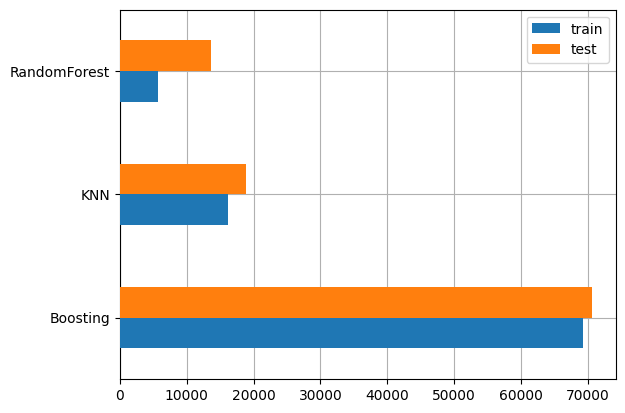

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### 3. Prediction target variable
Hasil prediksi nilai target berdasarkan ketiga model algoritma(KNN, RandomForest,dan Boosting) menggunakan beberapa harga dari data test.

In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting
2992,68855,68385.0,69552.0,60912.8
4110,78570,78747.5,77826.1,64950.9
513,60900,65735.0,56873.0,40997.6
11298,30045,33090.5,34084.4,39771.3
10525,29420,25880.5,28549.2,39609.6
10259,64085,55512.5,59280.7,54899.2
441,41850,43285.0,39066.2,39879.0
11218,21650,20650.0,18870.5,21839.4
523,57350,62640.0,59647.6,44905.2
5689,46635,53714.0,45180.4,39771.3


### 4. Calculates the difference between the predicted value and the y_true value
Untuk menghitung rata-rata selisih antara nilai aktual (y_true) dan nilai prediksi yang dihasilkan oleh tiga model berbeda: KNN (K-Nearest Neighbors), RandomForest, dan Boosting (AdaBoost).

In [ ]:
selisih_KNN = np.abs(pred_dict['y_true'] - pred_dict['prediksi_KNN'])
selisih_RF = np.abs(pred_dict['y_true'] - pred_dict['prediksi_RandomForest'])
selisih_Boosting = np.abs(pred_dict['y_true'] - pred_dict['prediksi_Boosting'])

rata_selisih_KNN = selisih_KNN.mean()
rata_selisih_RF = selisih_RF.mean()
rata_selisih_Boosting = selisih_Boosting.mean()

print(f"Rata-rata selisih KNN: {rata_selisih_KNN}")
print(f"Rata-rata selisih RandomForest: {rata_selisih_RF}")
print(f"Rata-rata selisih Boosting: {rata_selisih_Boosting}")

Rata-rata selisih KNN: 3544.4
Rata-rata selisih RandomForest: 2449.79
Rata-rata selisih Boosting: 9203.43


### 5. Model Accuracy Based on Each Algorithm
 Dengan menggunakan metode score() untuk semua model yang diuji dengan metrik yang sama, membandingkan kinerja relatif dari berbagai model dapat dilakukan. Ini membantu dalam pemilihan model terbaik untuk digunakan dalam situasi tertentu.

In [ ]:
pred1 = knn.predict(X_test)
score1 = knn.score(X_test, y_test)
print(f'Akurasi model dengan Algoritma KNN adalah {score1}')

Akurasi model dengan Algoritma KNN adalah 0.9049026725877694


In [ ]:
pred2 = boost.predict(X_test)
score2 = boost.score(X_test, y_test)
print(f'Akurasi model dengan Algoritma Boosting adalah {score2}')

Akurasi model dengan Algoritma Boosting adalah 0.6444445445331479


In [ ]:
pred3 = RF.predict(X_test)
score3 = RF.score(X_test, y_test)
print(f'Akurasi model dengan Algoritma RandomForest adalah {score3}')

Akurasi model dengan Algoritma RandomForest adalah 0.9313177979043304


**Notes:**
* Pada tahap evaluasi ini, model Random Forest (RF) menghasilkan skor nilai error paling kecil dibandingkan algoritma lain seperti KNN dan Boosting Algorithm.
* Model dengan algoritma tersebut juga memiliki nilai absolut dari rata-rata selisih antara nilai aktual (y_true) dan nilai prediksi yang terkecil. Itu mengindikasikan bahwa  model cenderung memiliki kinerja yang lebih baik. Dalam konteks prediksi, nilai selisih yang lebih kecil menunjukkan bahwa prediksi model lebih mendekati nilai aktual.
* Terlihat kembali bahwa pada bagian akurasi model menggunakan algoritma Random Forest menghasilkan skor yang cukup baik, yaitu 0.9313177979043304.
* Dapat disimpulkan bahwa Model Random Forest yang akan dipilih sebagai model terbaik untuk memprediksi harga jual mobil.

## Conclusion
Berdasarkan beberapa tahapan yang telah dilakukan, kesimpulan diperoleh sebagai berikut:
* Pemahaman mengenai Domain Proyek yang berisi latar belakang proyek, tujuan dan kebutuhan proyek, dan riset atau sumber referensi yang relevan dengan proyek telah disertakan.
* Pemahaman mengenai kasus bisnis yang berisi problem statemnets, goals, dan solution statements telah terselesaikan dan terbuktikan hasilnya.
* Pendeskripsian dan pemahaman mengenai informasi data-data, sumber dara, visualisasi data dan fitur/variabel yang digunakan sangat mendukung tahap-tahap pra-permodelan.
* Tahapan persiapan data yang terdiri Encoding fitur kategori, reduksi dengan Principal Component Analysis(PCA), Pembagian dataset, dan teknik standarisasi berhasil untuk dilakukan.
* Proses modeling melalui perbandingan tiga algoritma regresi seperti K-Nearest Neighbor, Random Forest, dan Bosting Algorithm menjadi acuan dalam pemilihan model proyek.
* Tahap evaluasi model menunjukan hasil yang berbeda-beda dengan terpilihnya Model Random Forest sebagai model terbaik untuk prediksi harga jual proyek ini.
